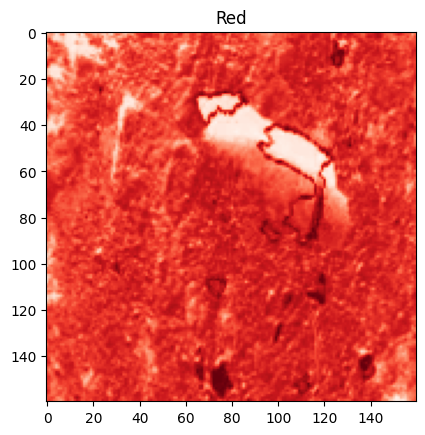

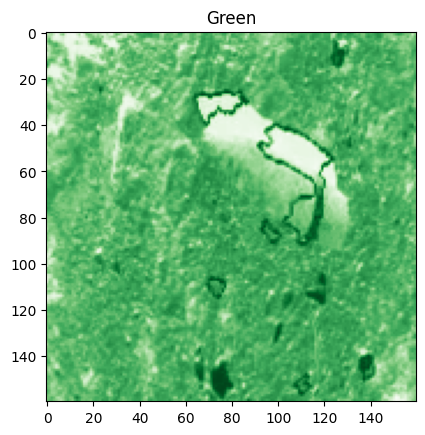

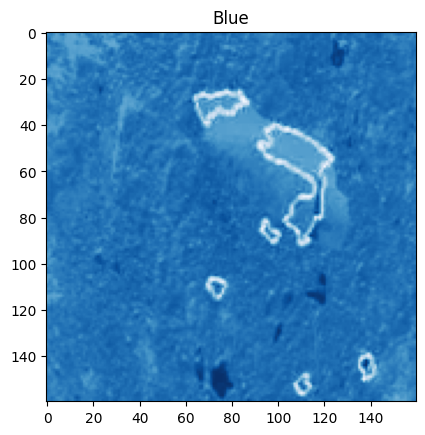

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_channel_matrix(channel, color, title):
    """
    Display a single color channel matrix as an image with a colormap and title.

    Parameters:
    - channel (np.ndarray): 2D array representing the color channel to display.
    - color (str): Colormap name to use for visualization (e.g., 'Reds', 'Greens', 'Blues').
    - title (str): Title to display above the image.
    """
    fig, ax = plt.subplots()
    ax.set_title(title)

    ax.imshow(channel, cmap=color)

    plt.show()


def extract_rgb(path):
    """
    Read an image from the given path, resize it to 160x160 pixels,
    convert it to RGB format, and display each RGB channel separately.

    Parameters:
    - path (str): Path to the image file.

    Returns:
    - None: Displays the RGB channels as images.
    """
    img = cv2.imread(path)
    img = cv2.resize(img, (160, 160))
    if img is None:
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]

    show_channel_matrix(R, 'Reds', 'Red')
    show_channel_matrix(G, 'Greens', 'Green')
    show_channel_matrix(B, 'Blues', 'Blue')


path = "rgb_test.jpeg"
extract_rgb(path)


In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_samples(dataset_loader, images_to_show, input_size=(640, 640)):
    """
    Args:
        dataset_loader (DataLoader): PyTorch DataLoader for the dataset.
        images_to_show (int): Number of images to display.
        input_size (tuple): Tuple specifying the width and height for resizing images.

    Returns:
        None
        Show samples from the dataset
    """
    dataset_classes = {
        0: "background",
        1: "UXO"
    }

    idx = 0
    for _, targets, image_paths in dataset_loader:
        print("For (non-resized) image:", image_paths[0])
        img = cv2.imread(image_paths[0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, input_size)

        for target in targets:
            x1_list = []
            y1_list = []
            box_idx = 0  # Index for boxes and labels

            for bbox in target["boxes"]:
                if len(bbox) == 4:
                    x1, y1, x2, y2 = map(int, bbox.tolist())
                    x1_list.append(x1)
                    y1_list.append(y1)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

            for label in target["labels"]:
                x1 = x1_list[box_idx]
                y1 = y1_list[box_idx]
                label = label.item()
                label_text = dataset_classes[label]

                if input_size[0] - x1 < 30 or input_size[1] - y1 < 30:
                    cv2.putText(img, str(label_text), (x1, y2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                else:
                    cv2.putText(img, str(label_text), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

                box_idx += 1

        plt.imshow(img)
        plt.axis("off")
        plt.show()

        idx += 1
        if idx >= images_to_show:
            break

dataset_loader = create
show_samples(dataset_loader=dataset_loader, images_to_show=10, input_size=input_size)


NameError: name 'dataset_loader' is not defined